In [1]:
#########################################################################################################################################
#########################################################################################################################################
#########################################################################################################################################

In [2]:
#########################################################################################################################################
#########################################################################################################################################
#########################################################################################################################################

In [3]:
# PACKAGE LIST: pip list

import scanpy as sc
import scirpy as ir
import pandas as pd
import muon as mu
import csv
import anndata
import matplotlib.pyplot as plt
import celltypist as celltypist
from celltypist import models

import numpy as np
import seaborn as sns 
from scipy.stats import median_abs_deviation
from cycler import cycler

from matplotlib import cm as mpl_cm

In [25]:
# Read previous mdata
mdata=mu.read_h5mu('msc_mdata.h5mu')
mdata

MuData object with n_obs × n_vars = 21699 × 25691
  obs:	'sample', 'group', 'batch'
  2 modalities
    gex:	20554 x 25691
      obs:	'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'sample', 'group', 'batch', 'liver', 'n_genes', 'doublet_score', 'predicted_doublet', 'leiden', 'leiden_res0_25', 'leiden_res0_5', 'leiden_res1', 'celltypist_cell_label_fine', 'celltypist_conf_score_fine'
      var:	'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
      uns:	'airr:chain_pairing_colors', 'batch_colors', 'celltypist_cell_label_fine_colors', 'dendrogram_celltypist_cell_label_fine', 'group_colors', 'hvg', 'leiden', 'leiden_colors', 'leiden_res0_25', 'leiden_res0_25_colors', 'leiden_res0_5', 'leiden_res0_5_colors', 'leiden_res1', 'leiden_res1_colors', 'log1p', 'neighbors', 'pca', 'predicted_doublet_colors', 'sample_colors', 'scrublet', 'umap'
      obsm:	'X_pca', 'X_umap'
      varm:	'PCs'
      layers:	'counts'
      obsp:	'connectivities', 'distances'
    airr:	6745 x 0
      obs:	'receptor_type', 'receptor_subtype', 'chain_pairing'
      uns:	'chain_indices'
      obsm:	'airr', 'chain_indices'

In [ ]:
#########################################################################################################################################
#########################################################################################################################################
#########################################################################################################################################

In [26]:
# 2.1 Computing clonotype neighborhood graphs

In [ ]:
#########################################################################################################################################
#########################################################################################################################################
#########################################################################################################################################

In [33]:
# Defining clonotypes (using CDR3 sequence)
ir.pp.ir_dist(mdata)
ir.tl.define_clonotypes(mdata, receptor_arms="all", dual_ir="primary_only")

# Creating clonotype network
ir.tl.clonotype_network(mdata, min_cells=2)

  0%|          | 0/4431 [00:00<?, ?it/s]

In [34]:
# Clonotype plots

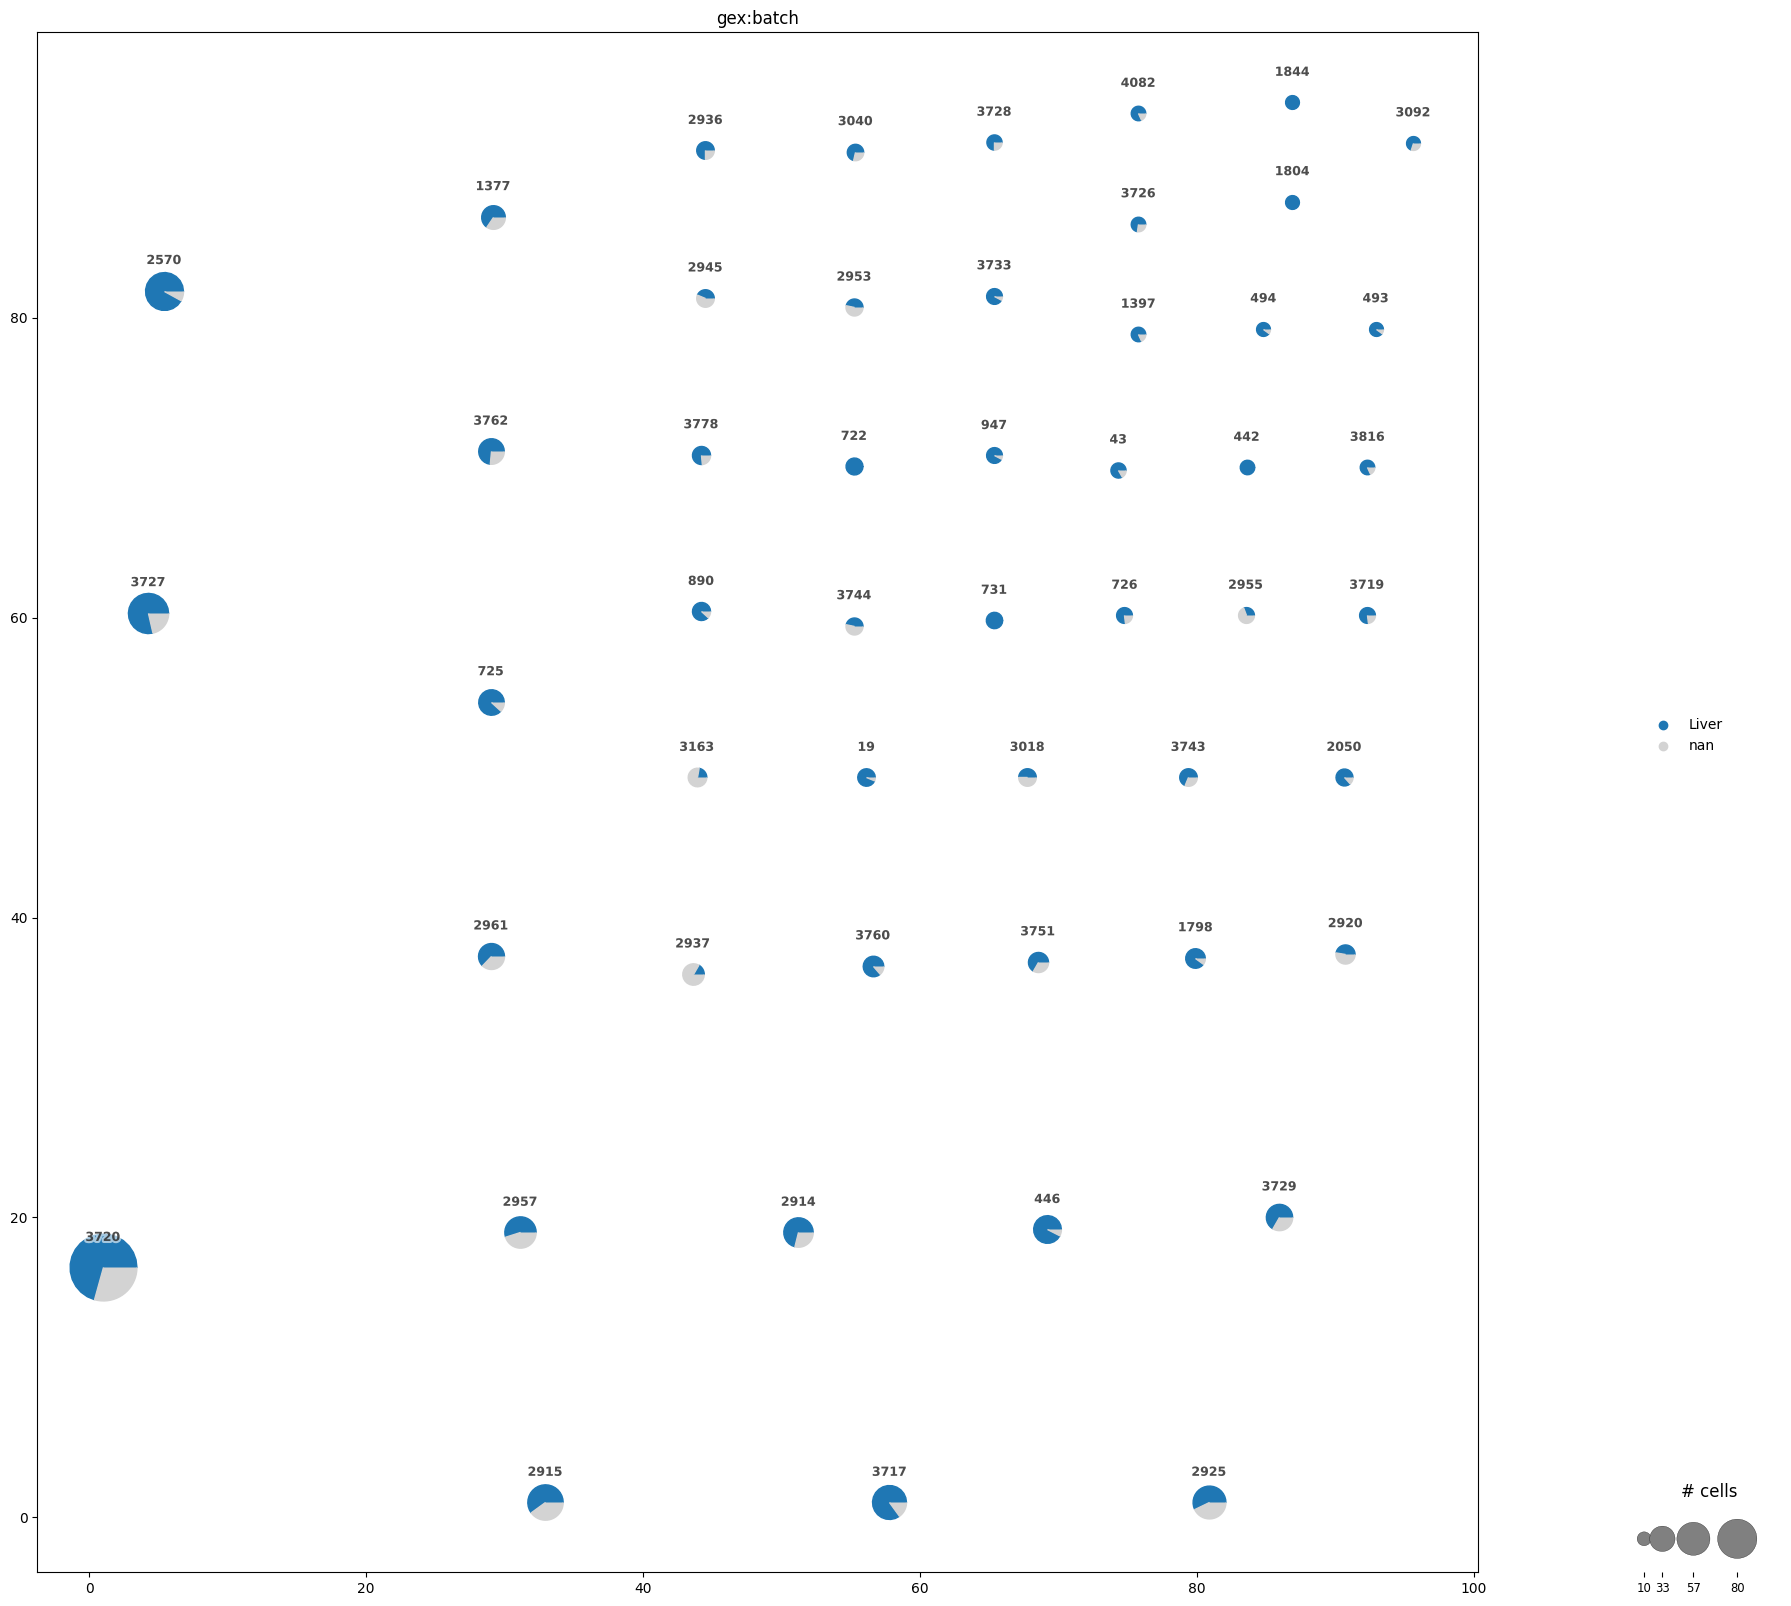

In [32]:
_ = ir.pl.clonotype_network(mdata, color="gex:batch", base_size=10, label_fontsize=9, panel_size=(20, 20))

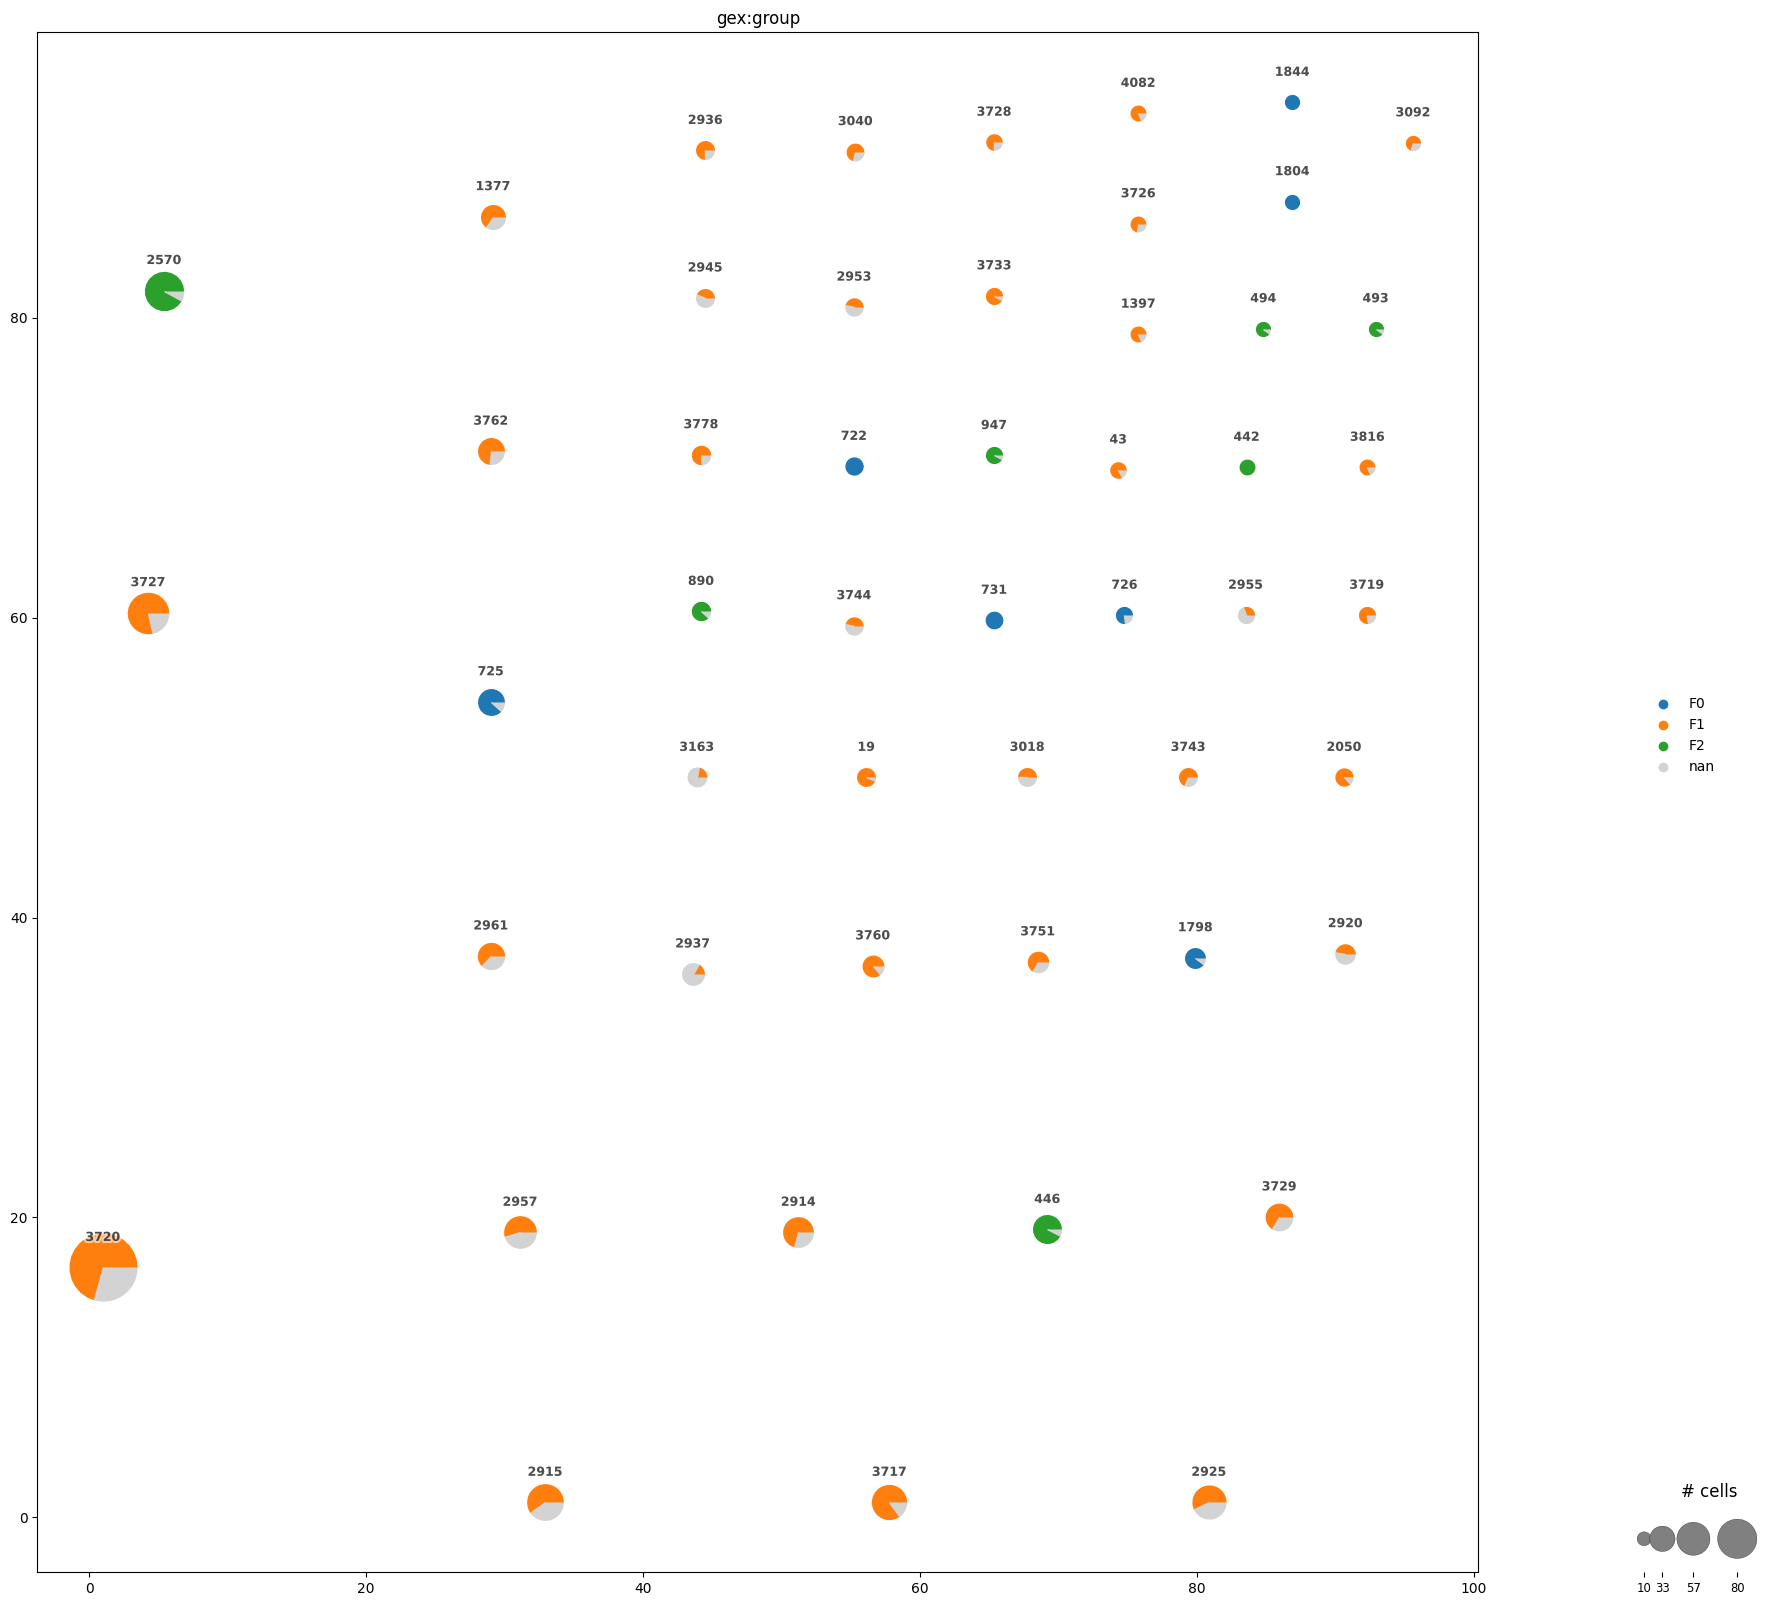

In [28]:
ir.tl.clonotype_network(mdata, min_cells=10)
_ = ir.pl.clonotype_network(mdata, color="gex:group", base_size=10, label_fontsize=9, panel_size=(20, 20))

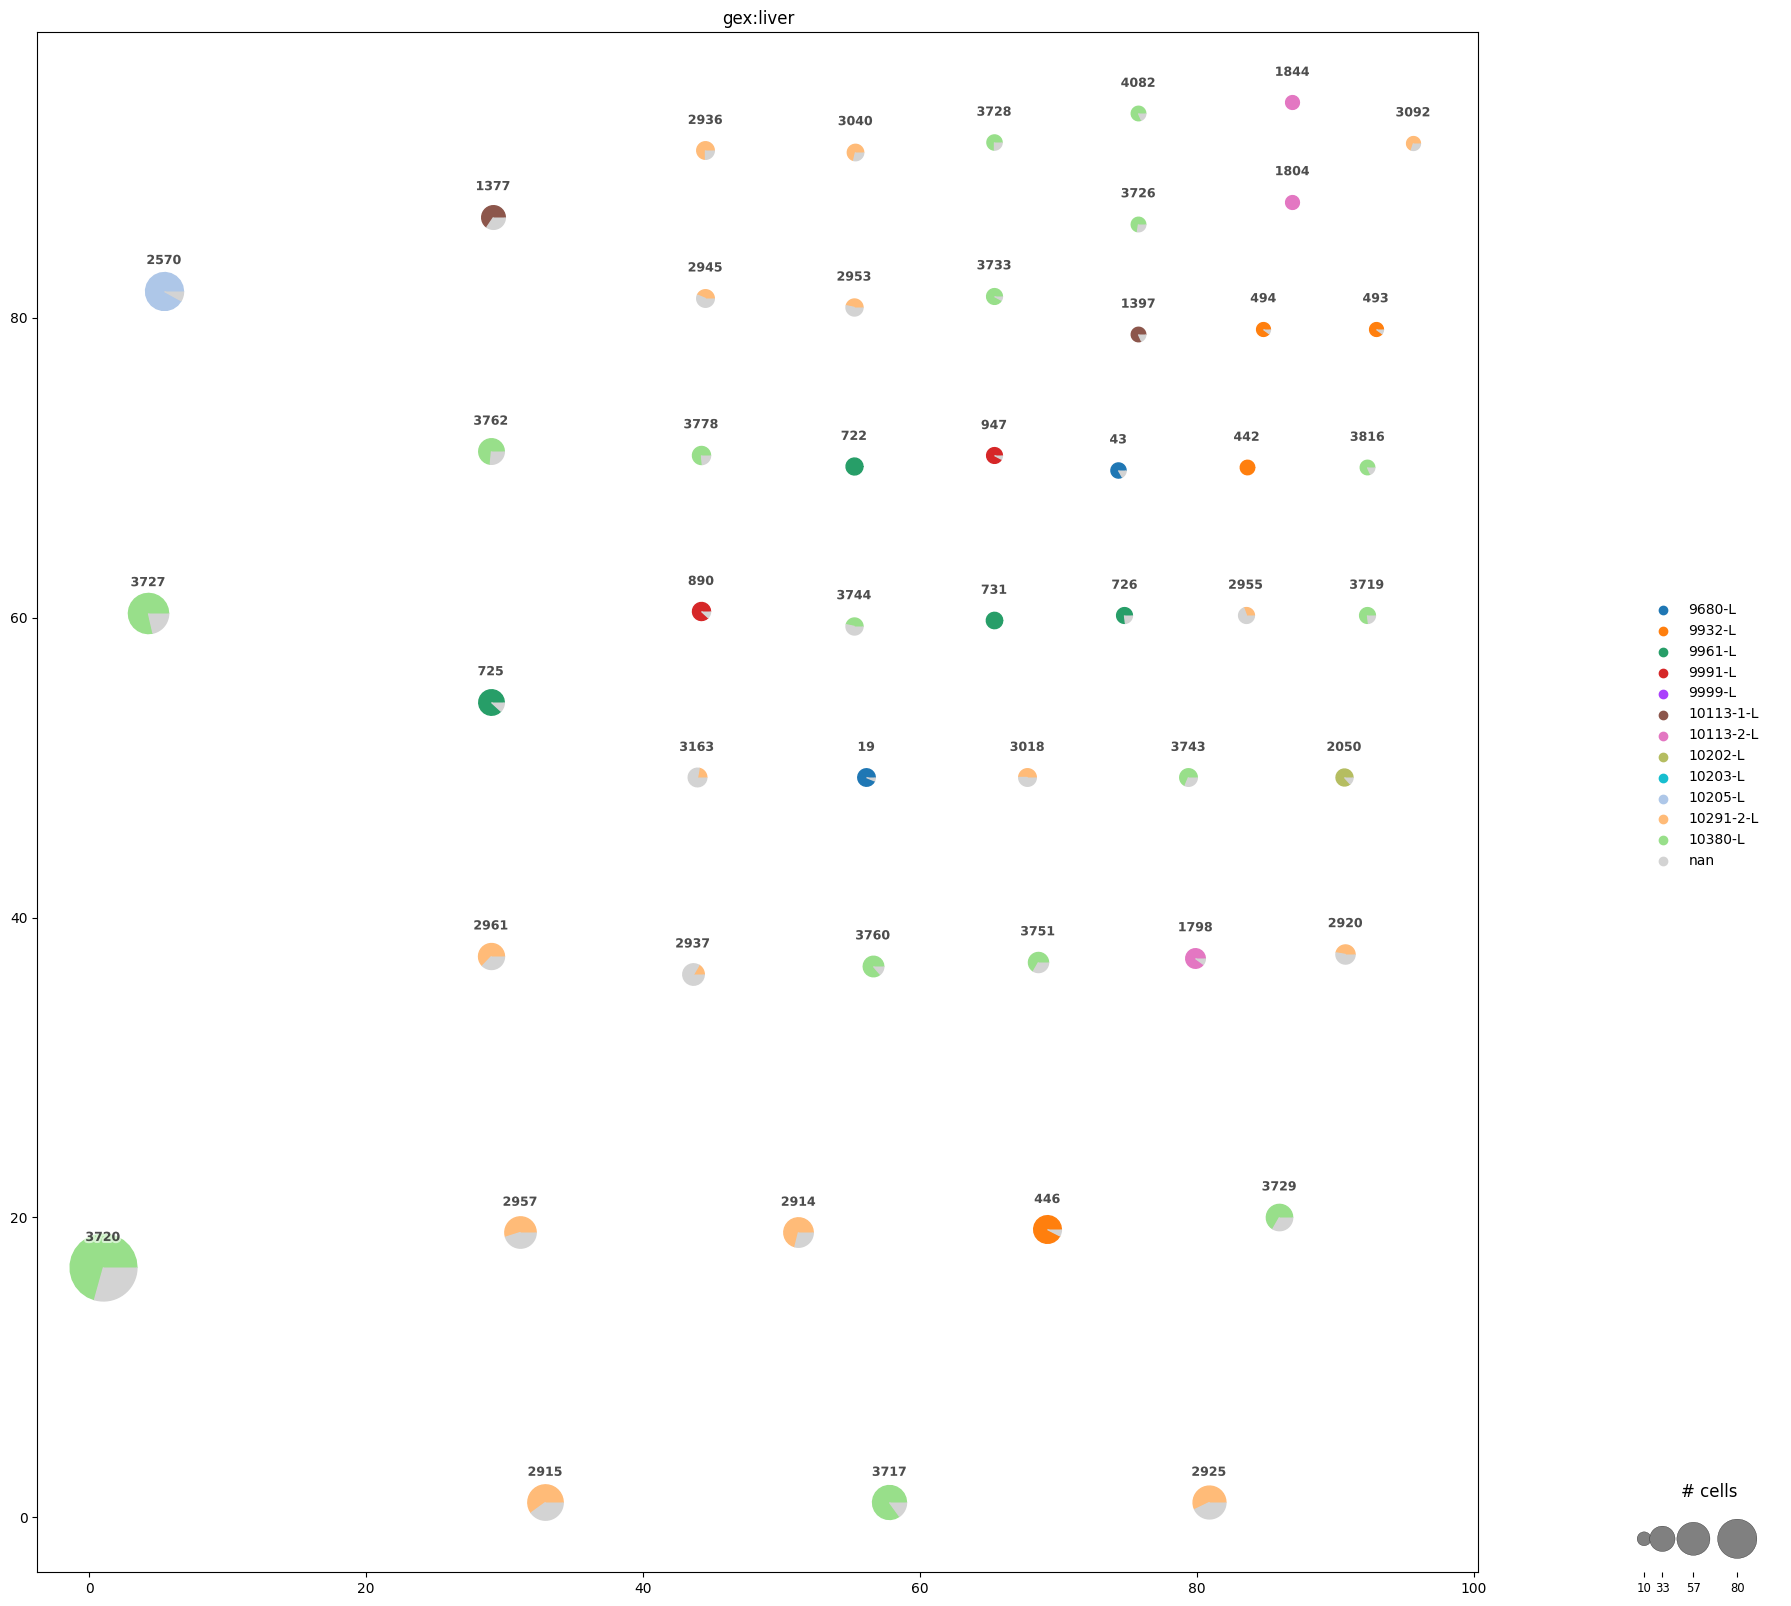

In [29]:
_ = ir.pl.clonotype_network(mdata, color="gex:liver", base_size=10, label_fontsize=9, panel_size=(20, 20))

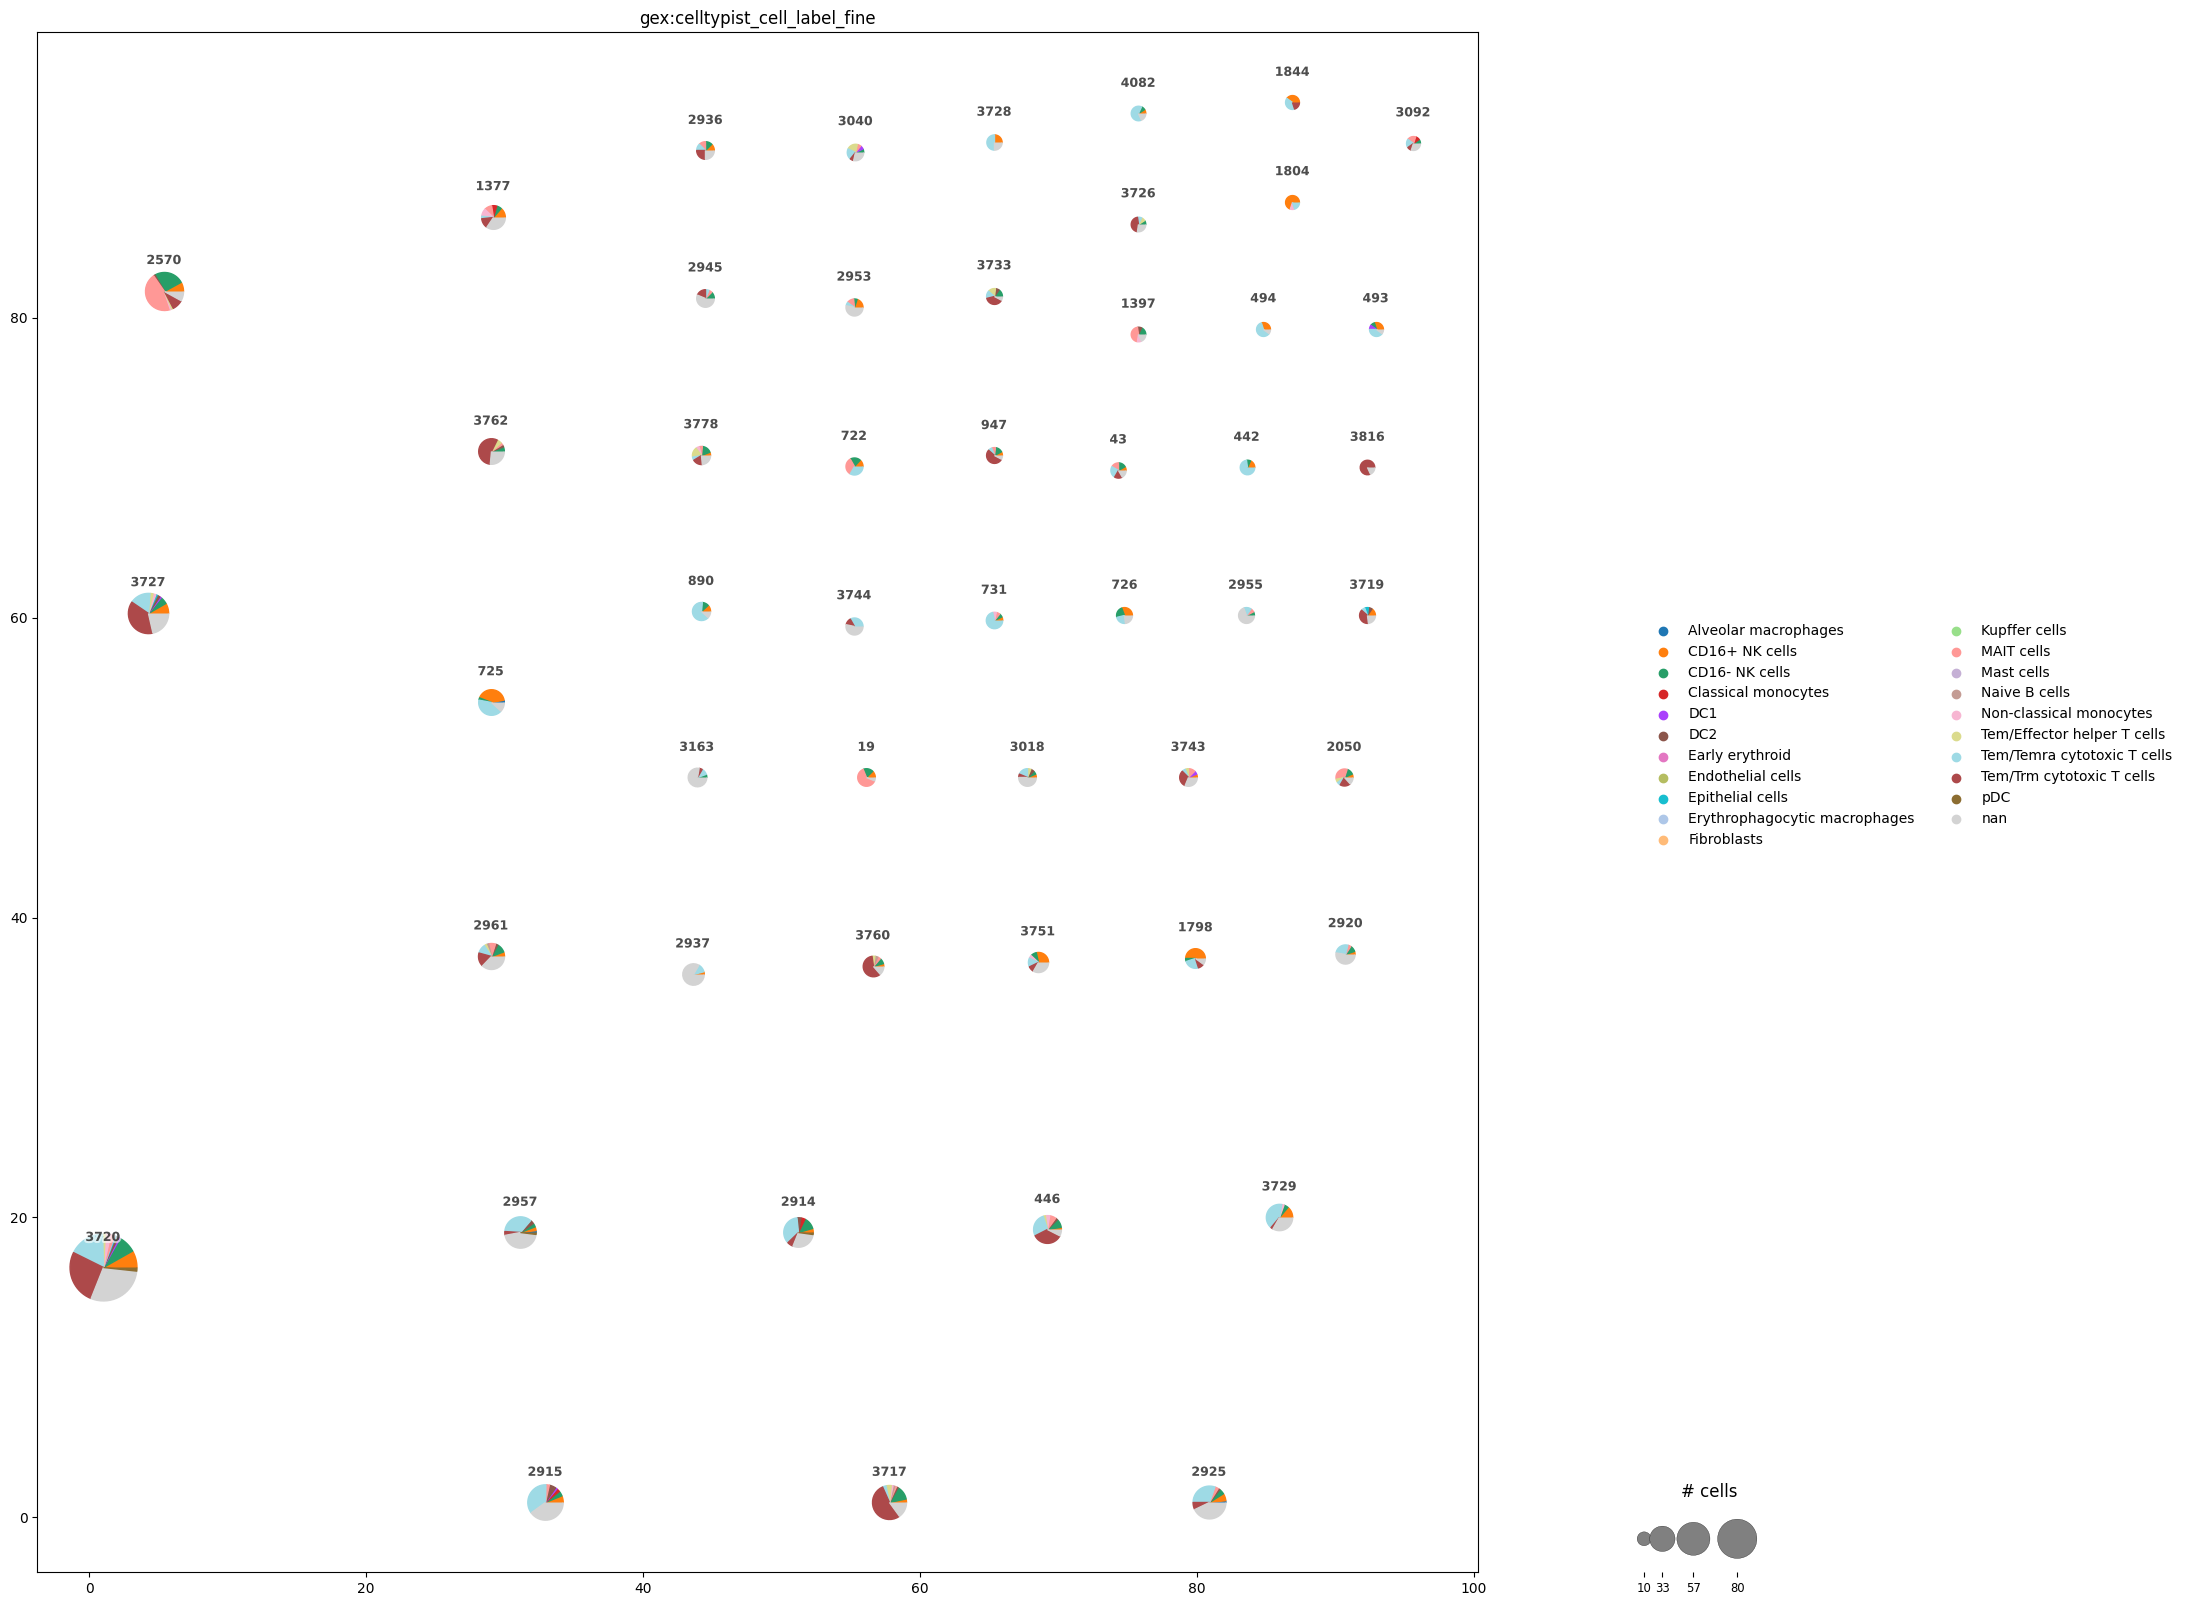

In [30]:
_ = ir.pl.clonotype_network(mdata, color="gex:celltypist_cell_label_fine", base_size=10, label_fontsize=9, panel_size=(20, 20))

In [39]:
# Defining clonotype clusters (using amino acid sequences)
ir.pp.ir_dist(
    mdata,
    metric="tcrdist",
    sequence="aa",
    cutoff=15,
)
ir.tl.define_clonotype_clusters(mdata, sequence="aa", metric="tcrdist", receptor_arms="all", dual_ir="any")
ir.tl.clonotype_network(mdata, min_cells=5, sequence="aa", metric="tcrdist")

  0%|          | 0/4656 [00:00<?, ?it/s]

... storing 'airr:cc_aa_tcrdist' as categorical
... storing 'cc_aa_tcrdist' as categorical


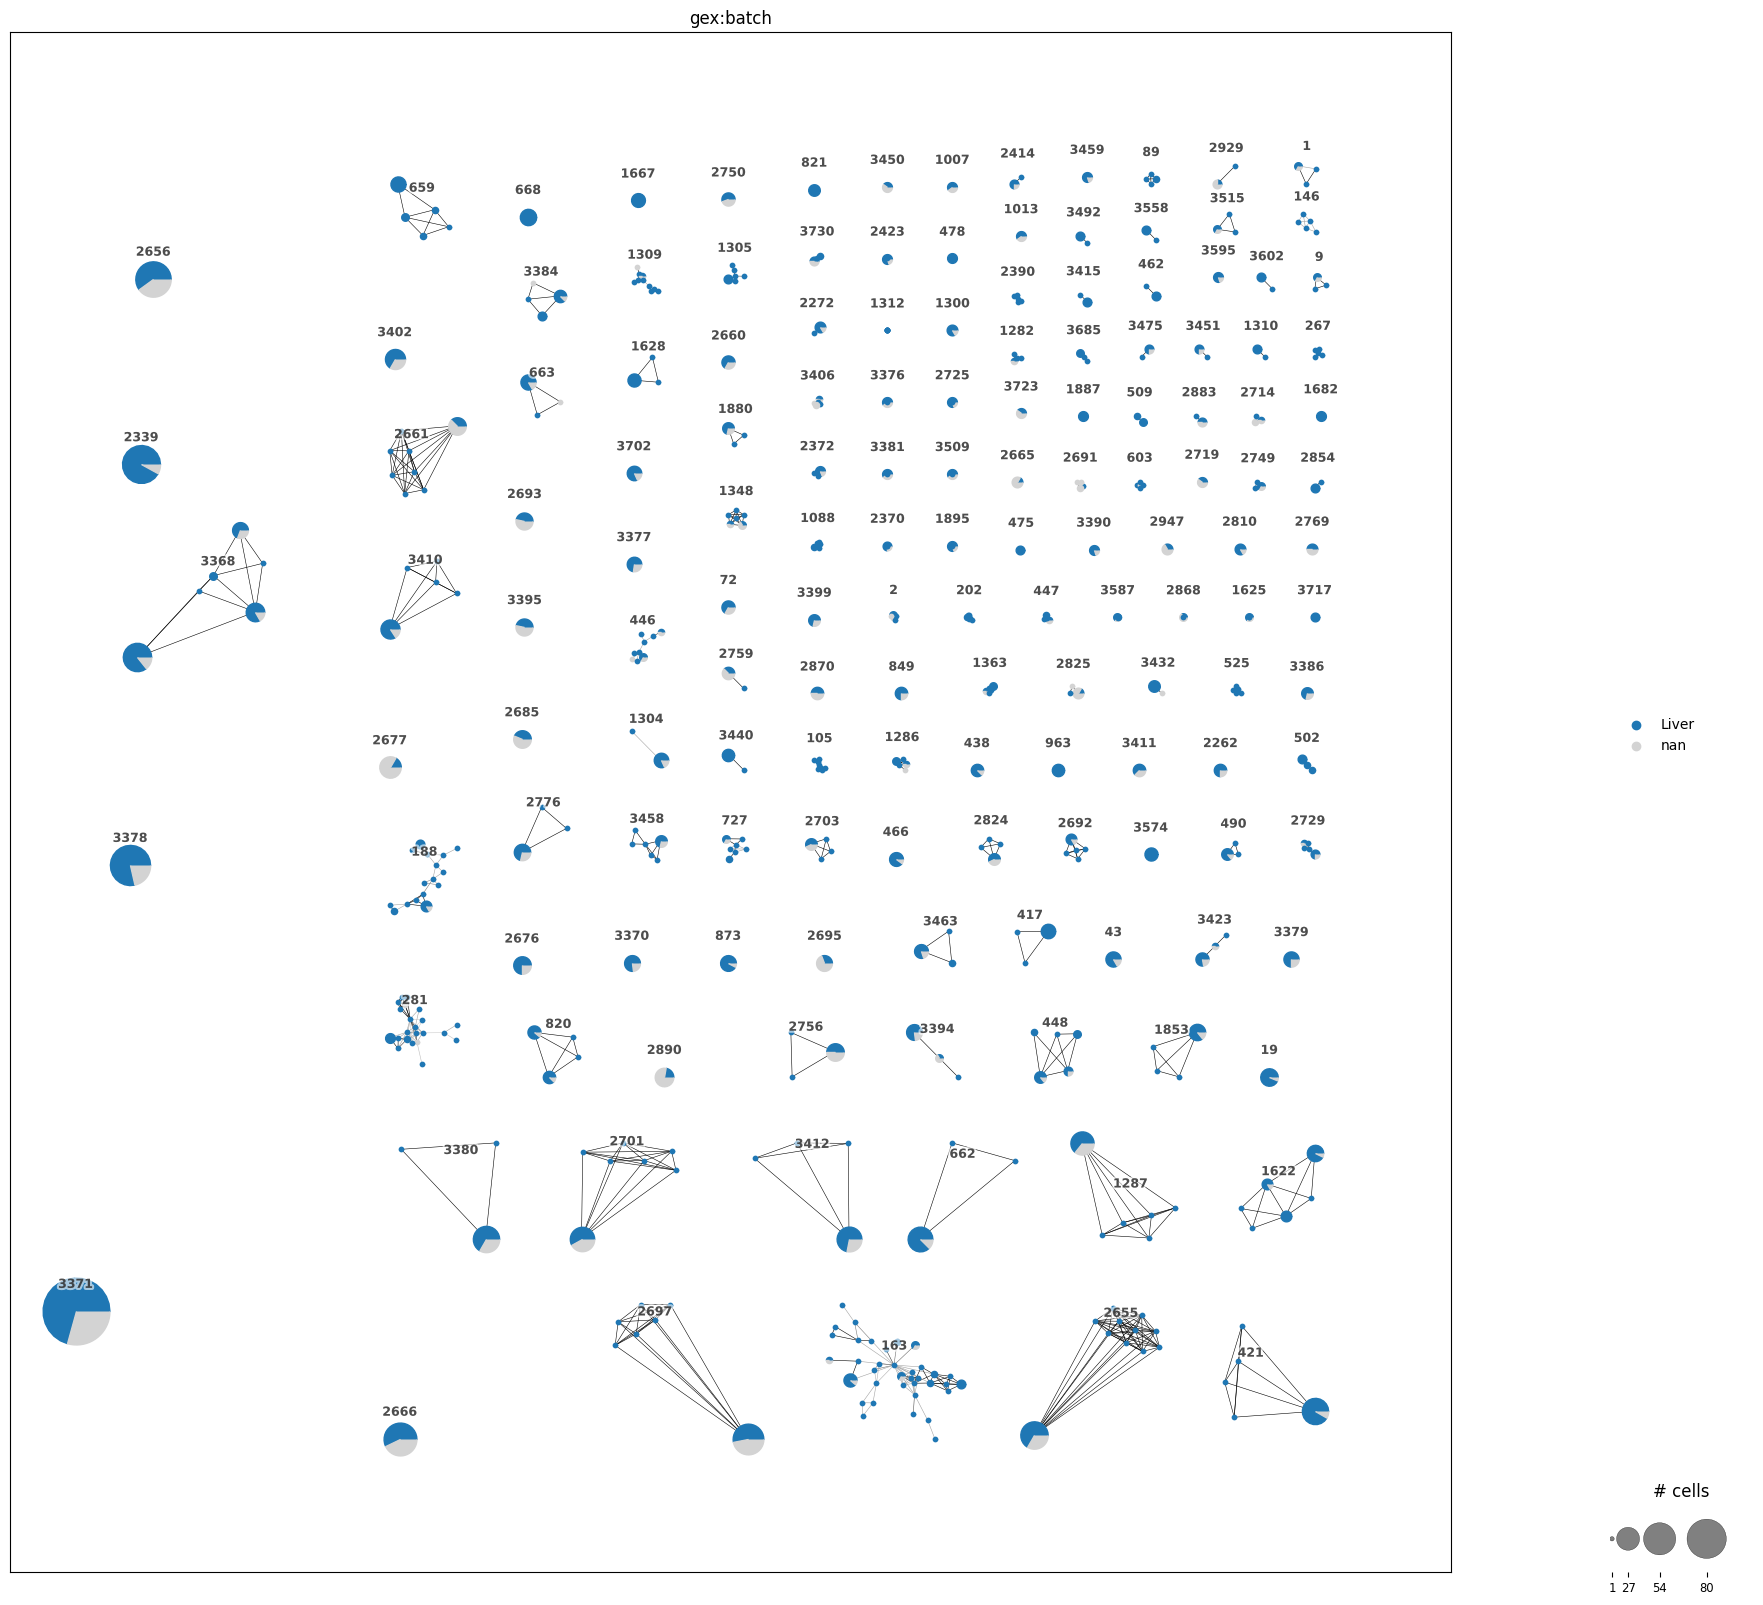

In [40]:
# Clonotype cluster plots
_ = ir.pl.clonotype_network(mdata, color="gex:batch", base_size=10, label_fontsize=9, panel_size=(20, 20))

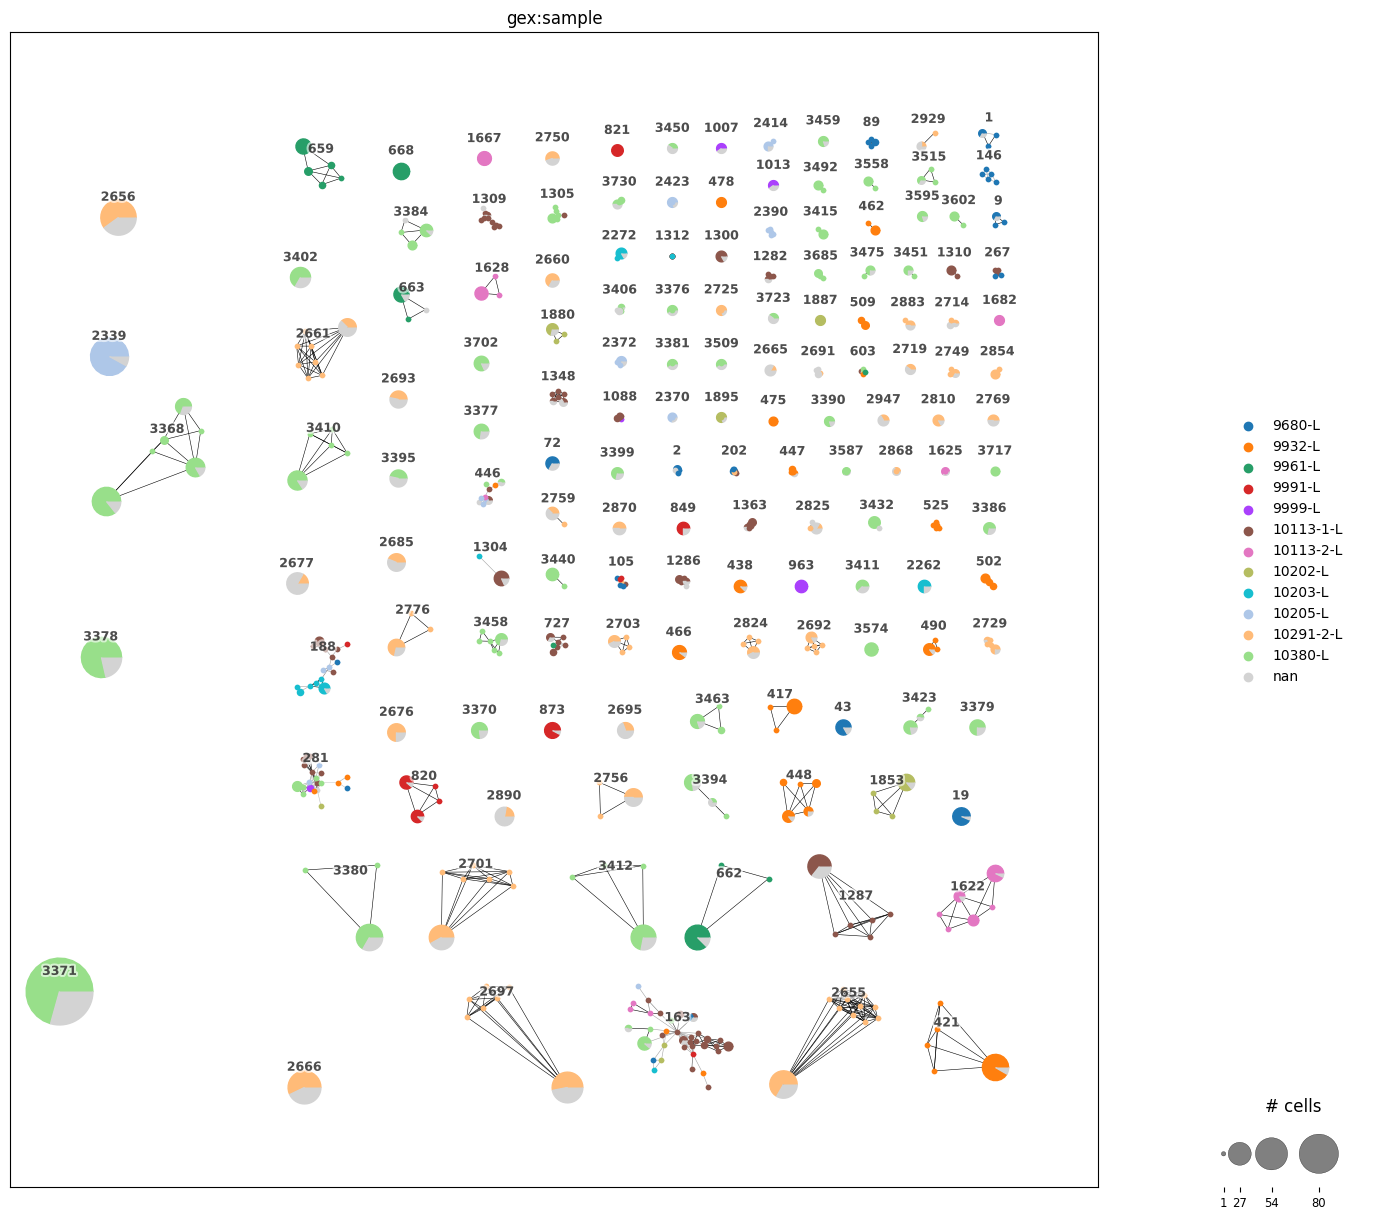

In [41]:
_ = ir.pl.clonotype_network(mdata, color="gex:sample", label_fontsize=9, panel_size=(15, 15), base_size=10)

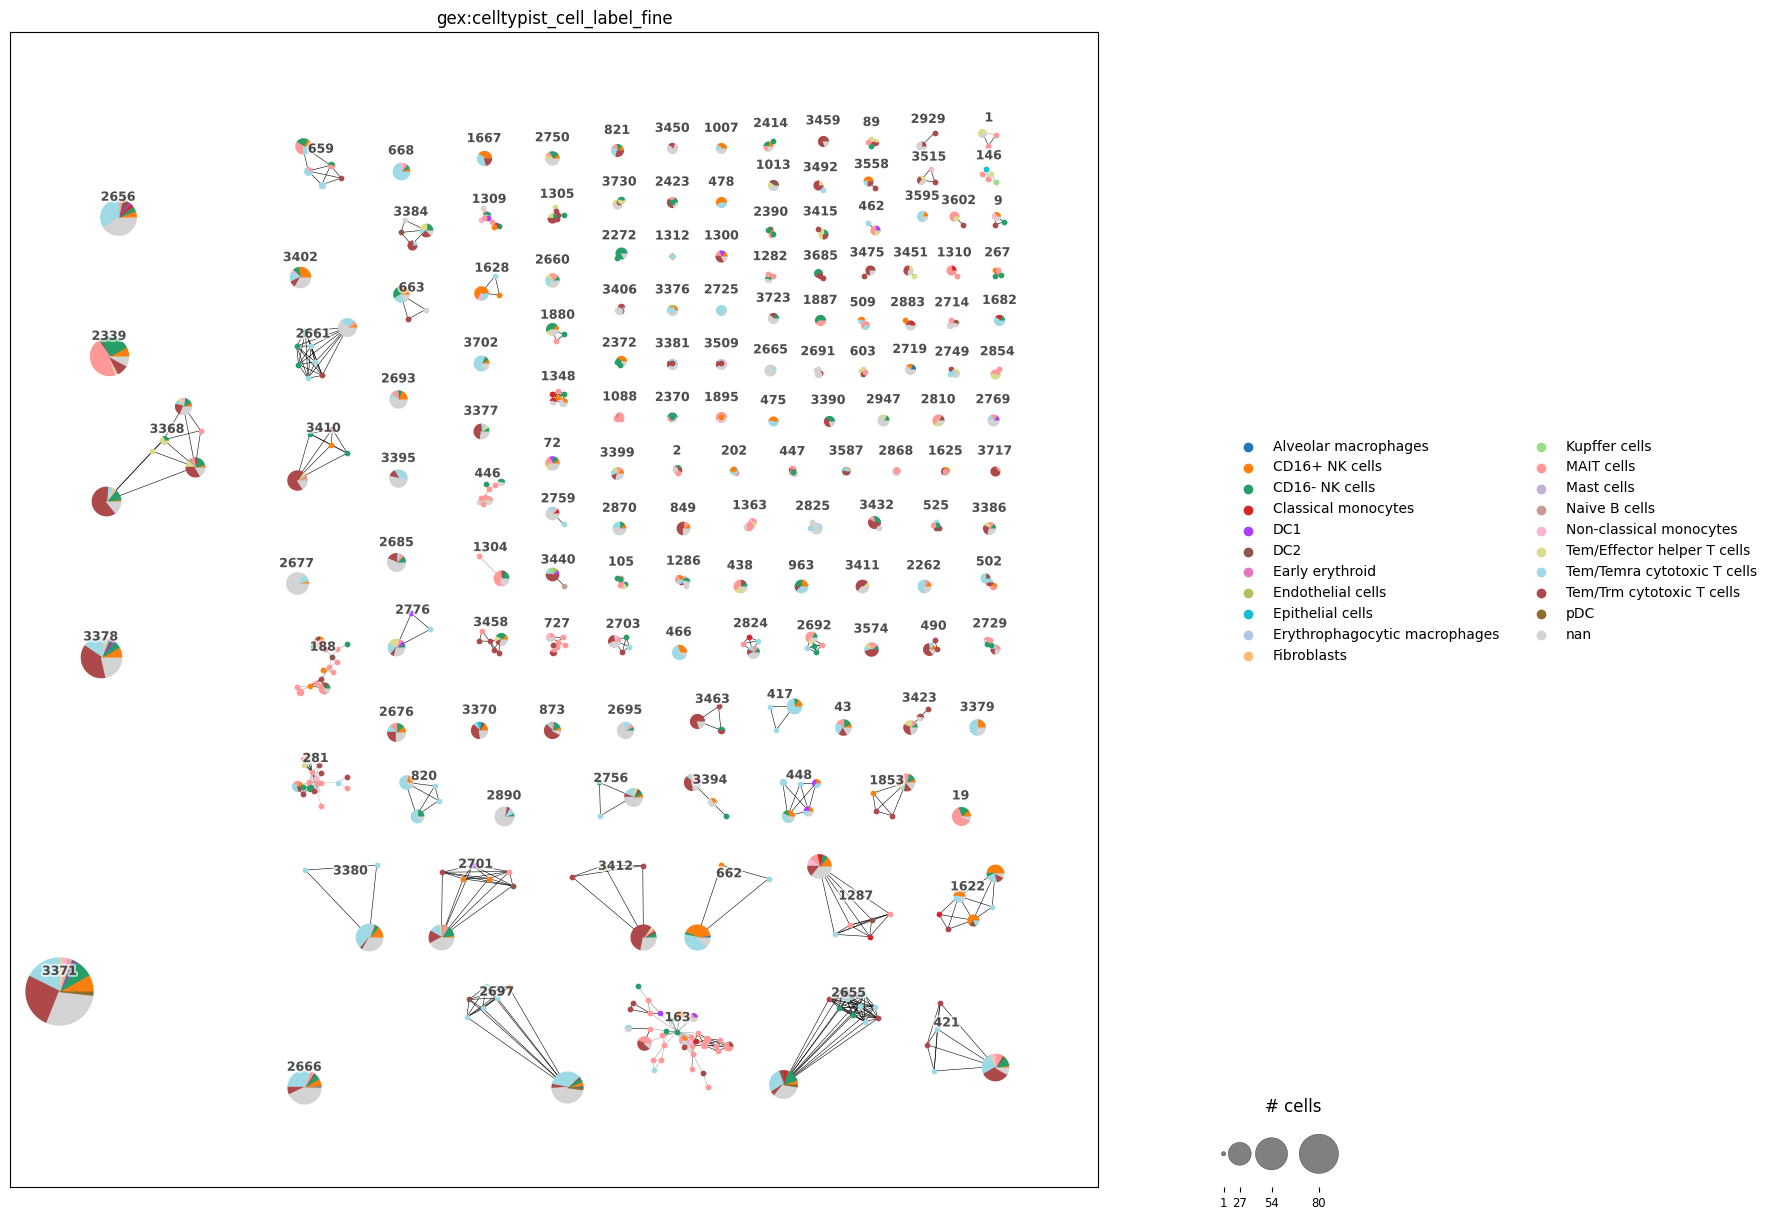

In [42]:
_ = ir.pl.clonotype_network(mdata, color="gex:celltypist_cell_label_fine", label_fontsize=9, panel_size=(15, 15), base_size=10)

In [49]:
mdata.write('msc_mdata2.h5mu')

In [48]:
with ir.get.airr_context(mdata, "junction_aa", ["VJ_1", "VDJ_1", "VJ_2", "VDJ_2"]):
    clonotype_info = (
        mdata.obs.loc[lambda x: x["airr:cc_aa_tcrdist"]== '3371']
        .astype(str)
        .groupby(
            [
                "VJ_1_junction_aa",
                "VDJ_1_junction_aa",
                "VJ_2_junction_aa",
                "VDJ_2_junction_aa",
                "airr:receptor_subtype",
                'gex:celltypist_cell_label_fine',
                'gex:sample',
            ],
            observed=True,
            dropna=False,
        )
        .size()
        .reset_index(name="n_cells")
    )
clonotype_info

... storing 'VJ_1_junction_aa' as categorical
... storing 'VDJ_1_junction_aa' as categorical
... storing 'VJ_2_junction_aa' as categorical
... storing 'VDJ_2_junction_aa' as categorical


,VJ_1_junction_aa,VDJ_1_junction_aa,VJ_2_junction_aa,VDJ_2_junction_aa,airr:receptor_subtype,gex:celltypist_cell_label_fine,gex:sample,n_cells
0,CAVEDRDDKIIF,CASSPQGARYYGYTF,nan,nan,TRA+TRB,CD16+ NK cells,10380-L,19
1,CAVEDRDDKIIF,CASSPQGARYYGYTF,nan,nan,TRA+TRB,CD16- NK cells,10380-L,20
2,CAVEDRDDKIIF,CASSPQGARYYGYTF,nan,nan,TRA+TRB,DC1,10380-L,2
3,CAVEDRDDKIIF,CASSPQGARYYGYTF,nan,nan,TRA+TRB,DC2,10380-L,3
4,CAVEDRDDKIIF,CASSPQGARYYGYTF,nan,nan,TRA+TRB,Epithelial cells,10380-L,1
5,CAVEDRDDKIIF,CASSPQGARYYGYTF,nan,nan,TRA+TRB,Erythrophagocytic macrophages,10380-L,1
6,CAVEDRDDKIIF,CASSPQGARYYGYTF,nan,nan,TRA+TRB,MAIT cells,10380-L,4
7,CAVEDRDDKIIF,CASSPQGARYYGYTF,nan,nan,TRA+TRB,Non-classical monocytes,10380-L,6
8,CAVEDRDDKIIF,CASSPQGARYYGYTF,nan,nan,TRA+TRB,Tem/Effector helper T cells,10380-L,3
9,CAVEDRDDKIIF,CASSPQGARYYGYTF,nan,nan,TRA+TRB,Tem/Temra cytotoxic T cells,10380-L,40


In [31]:
with ir.get.airr_context(mdata, "junction_aa", ["VJ_1", "VDJ_1", "VJ_2", "VDJ_2"]):
    clonotype_info = (
        mdata.obs.loc[lambda x: (x["VJ_1_junction_aa"] == "CAVMDSNYQLIW") & (x["VDJ_1_junction_aa"] == "CASSVKGTSGINEQFF")] #replace & with | if u want or 
        .astype(str)
        .groupby(
            [
                "VJ_1_junction_aa",
                "VDJ_1_junction_aa",
                "VJ_2_junction_aa",
                "VDJ_2_junction_aa",
                "airr:receptor_subtype",
                'gex:celltypist_cell_label_fine',
                'gex:sample',
                'airr:clone_id',
            ],
            observed=True,
            dropna=False,
        )
        .size()
        .reset_index(name="n_cells")
    )
clonotype_info

... storing 'VJ_1_junction_aa' as categorical
... storing 'VDJ_1_junction_aa' as categorical
... storing 'VJ_2_junction_aa' as categorical
... storing 'VDJ_2_junction_aa' as categorical


,VJ_1_junction_aa,VDJ_1_junction_aa,VJ_2_junction_aa,VDJ_2_junction_aa,airr:receptor_subtype,gex:celltypist_cell_label_fine,gex:sample,airr:clone_id,n_cells
0,CAVMDSNYQLIW,CASSVKGTSGINEQFF,nan,nan,TRA+TRB,CD16+ NK cells,10205-L,2570,6
1,CAVMDSNYQLIW,CASSVKGTSGINEQFF,nan,nan,TRA+TRB,CD16- NK cells,10205-L,2570,19
2,CAVMDSNYQLIW,CASSVKGTSGINEQFF,nan,nan,TRA+TRB,DC2,10205-L,2570,1
3,CAVMDSNYQLIW,CASSVKGTSGINEQFF,nan,nan,TRA+TRB,MAIT cells,10205-L,2570,34
4,CAVMDSNYQLIW,CASSVKGTSGINEQFF,nan,nan,TRA+TRB,Non-classical monocytes,10205-L,2570,1
5,CAVMDSNYQLIW,CASSVKGTSGINEQFF,nan,nan,TRA+TRB,Tem/Effector helper T cells,10205-L,2570,1
6,CAVMDSNYQLIW,CASSVKGTSGINEQFF,nan,nan,TRA+TRB,Tem/Trm cytotoxic T cells,10205-L,2570,7
7,CAVMDSNYQLIW,CASSVKGTSGINEQFF,nan,nan,TRA+TRB,nan,nan,2570,6
